In [3]:
#@markdown ### **Imports**
# diffusion policy import
from typing import Tuple, Sequence, Dict, Union, Optional, Callable
import numpy as np
import math
import torch
import torch.nn as nn
import torchvision
import collections
import zarr
from diffusers.schedulers.scheduling_ddpm import DDPMScheduler
from diffusers.training_utils import EMAModel
from diffusers.optimization import get_scheduler
from tqdm.auto import tqdm
from tqdm import tqdm_notebook

# env import
import gym
from gym import spaces
import pygame
import pymunk
import pymunk.pygame_util
from pymunk.space_debug_draw_options import SpaceDebugColor
from pymunk.vec2d import Vec2d
import shapely.geometry as sg
import cv2
import skimage.transform as st
from skvideo.io import vwrite
from IPython.display import Video
import gdown
import os

pygame 2.1.2 (SDL 2.0.16, Python 3.9.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


# data

Fisrtly, we load the data

In [8]:
dataset_path = "pusht_cchi_v7_replay.zarr.zip"
dataset_root = zarr.open(dataset_path, 'r')
train_image_data = dataset_root['data']['img'][:]

In [14]:
print("First  images:")
print(train_image_data.shape)
print(train_image_data[:1])
image = train_image_data[:1]

First  images:
(25650, 96, 96, 3)
[[[[255. 255. 255.]
   [248. 248. 248.]
   [248. 248. 248.]
   ...
   [248. 248. 248.]
   [248. 248. 248.]
   [255. 255. 255.]]

  [[248. 248. 248.]
   [222. 222. 222.]
   [233. 233. 233.]
   ...
   [233. 233. 233.]
   [222. 222. 222.]
   [248. 248. 248.]]

  [[247. 247. 247.]
   [233. 233. 233.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [233. 233. 233.]
   [247. 247. 247.]]

  ...

  [[247. 247. 247.]
   [233. 233. 233.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [233. 233. 233.]
   [247. 247. 247.]]

  [[248. 248. 248.]
   [222. 222. 222.]
   [233. 233. 233.]
   ...
   [233. 233. 233.]
   [222. 222. 222.]
   [248. 248. 248.]]

  [[255. 255. 255.]
   [248. 248. 248.]
   [248. 248. 248.]
   ...
   [248. 248. 248.]
   [248. 248. 248.]
   [255. 255. 255.]]]]


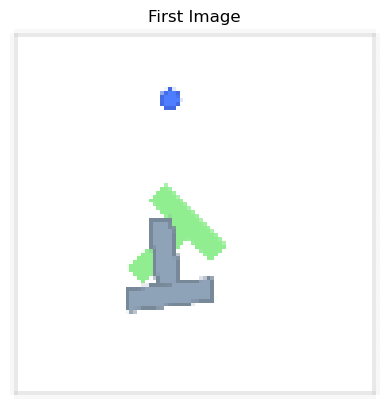

In [15]:
import matplotlib.pyplot as plt
image /= 255.0
plt.imshow(image[0])
plt.title('First Image')
plt.axis('off')  # 不显示坐标轴
plt.show()